# Загружаем необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import seaborn as sns

# Загрузка исходных данных и предварительная обработка

In [ ]:
df_work = pd.read_csv('/content/movies_dataset_from_allmovie.csv')
df_work = df_work.drop(columns=['poster', 'domain', 'trailer', 'language', 'crawled_at', 'url', '_id'])
df_work.sample(15)

index                                        name  \
3350    3350                                 Blood Games   
10447  10447                           Fear in the Night   
4736    4736                         Caravan to Vaccares   
3488    3488                                   Blue Tree   
4164    4164                                   The Brood   
5937    5937                               Club Paradise   
4070    4070                        Bridge to Terabithia   
3738    3738                          Book of Revelation   
8529    8529  Dizzy Gillespie: Diz &amp; Bird &amp; Hawk   
3602    3602                 Body and Soul: Body, Part 1   
8926    8926                              Dragon's Claws   
1115    1115                               Lethal Lolita   
3315    3315                                    The Blob   
6241    6241      Common Threads: Stories from the Quilt   
2431    2431                   Beethoven: Piano Concerti   

                                                   genre          released_at  \
3350                                               Drama  1990-01-01 00:00:00   
10447                                  Mystery, Thriller  1947-04-18 00:00:00   
4736                         Action, Adventure, Spy Film  1974-01-01 00:00:00   
3488                                         Visual Arts  1979-01-01 00:00:00   
4164                             Horror, Science Fiction  1979-05-25 00:00:00   
5937                                              Comedy  1986-07-11 00:00:00   
4070                            Children's/Family, Drama  1985-01-01 00:00:00   
3738   Language &amp; Literature, Spirituality &amp; ...  1980-01-01 00:00:00   
8529                                               Music                  NaN   
3602                    History, Sports &amp; Recreation  1968-01-01 00:00:00   
8926                                              Action  1979-01-01 00:00:00   
1115                                               Drama  1992-12-28 00:00:00   
3315                                              Horror  1988-08-05 00:00:00   
6241                               Culture &amp; Society  1989-01-01 00:00:00   
2431                                               Music  1989-01-01 00:00:00   

               director duration  \
3350    Tanya Rosenberg    1H30M   
10447     Maxwell Shane    1H11M   
4736     Geoffrey Reeve    1H38M   
3488                NaN    0H34M   
4164   David Cronenberg    1H31M   
5937       Harold Ramis    1H35M   
4070          Eric Till    0H55M   
3738                NaN    0H27M   
8529                NaN    0H30M   
3602                NaN    0H24M   
8926         Joseph Kuo    1H30M   
1115       Bradford May    1H34M   
3315      Chuck Russell    1H32M   
6241     Robert Epstein    1H20M   
2431                NaN    1H10M   

                                                synopsis  average_rating  \
3350   When some locals get whomped in a baseball gam...             NaN   
10447  One of several low-budget mellers directed by ...             7.9   
4736   This glossy Alistair MacLean action programmer...             NaN   
3488                                                 NaN             NaN   
4164   Canadian director David Cronenberg followed hi...             7.2   
5937   Harold Ramis's comedy farce Club Paradise star...             4.2   
4070   Jess is determined to be the fastest kid in hi...             6.4   
3738                                                 NaN             NaN   
8529                                                 NaN             NaN   
3602                                                 NaN             NaN   
8926                                                 NaN             NaN   
1115   One of three made-for-television films recount...             1.0   
3315   After the phenomenal box-office and critical s...             6.7   
6241   This film, narrated by Dustin Hoffman, won an ...             6.3   
2431                            

In [ ]:
df_dash = df_work[['index', 'name', 'genre', 'released_at', 'director',	'duration', 'synopsis', 'average_rating', 'cast']].dropna(subset='genre')
df_dash['genre'] = df_dash['genre'].str.replace('News \[TV\]','TV &amp; Radio')
df_dash['genre'] = df_dash['genre'].str.replace('Comedy Drama','Comedy, Drama')

df_dash['duration'] = np.where(df_dash['duration'].isnull(), '0H0',df_dash['duration'])
df_dash['duration'] = df_dash['duration'].str.replace('M', '')
df_dash['duration'] = df_dash['duration'].str.split('H')
df_dash['duration'] = df_dash['duration'].str[0].astype(int)*60 + df_dash['duration'].str[1].astype(int)
df_dash = df_dash.astype({'duration':'Int64'})
df_dash['duration'] = np.where(df_dash['duration'] == 0, np.nan, df_dash['duration'])

df_dash['decade'] = 0
df_dash['decade'] = np.where(df_dash['released_at'].isnull() == False, pd.to_datetime(df_dash['released_at']).dt.year//10*10,0)
df_dash = df_dash.astype({'decade':'Int64'})
df_dash['decade'] = np.where(df_dash['decade'] == 0, np.nan, df_dash['decade'])

dfg = df_dash[['genre']]

dfg['genre'] = dfg['genre'].str.split(', ')
dfg2 = dfg.explode('genre')
dfgenre_unique = list(dfg2.genre.unique())

genre_dict = {}
for genre in dfgenre_unique:
    genre_dict[genre] = len(df_dash[df_dash['genre'].str.contains(genre)])

df_genre_film_count = pd.DataFrame(genre_dict.keys(), columns=['name'])
df_genre_film_count['values'] = genre_dict.values()
#df_genre_film_count.sort_values(by='values')

df_dashed = df_dash[['decade']]
decade_list = df_dashed.drop_duplicates()
df_dash['genre'] = df_dash['genre'].str.split(', ')
df_dash_final = df_dash.explode('genre')
#df_dash_final.to_csv('result.csv', index = False, sep=';')

In [ ]:
df_dash_final

index                                             name  \
0          0  10 Days, 10 Years: Nicaraguan Elections of 1990   
1          1   1-2-3 Magic: Effective Discipline for Children   
2          2                        10 Keys to Personal Power   
3          3           10,000 Maniacs: Time Capsule 1982-1990   
4          4                              10 Rillington Place   
...      ...                                              ...   
10520  10520                                Feud of the Trail   
10520  10520                                Feud of the Trail   
10521  10521                                            Fever   
10522  10522                                            Fever   
10523  10523                         La fièvre monte à El Pao   

                       genre          released_at           director duration  \
0      Culture &amp; Society  1990-01-01 00:00:00                NaN       54   
1                  Education  1990-01-01 00:00:00                NaN      120   
2                   Business                  NaN                NaN       64   
3                      Music  1990-01-01 00:00:00                NaN       58   
4                      Crime  1971-02-10 00:00:00  Richard Fleischer      111   
...                      ...                  ...                ...      ...   
10520                 Action  1937-01-01 00:00:00        Robert Hill       58   
10520                Western  1937-01-01 00:00:00        Robert Hill       58   
10521                Mystery  1988-01-01 00:00:00       Craig Lahiff       92   
10522               Thriller  1991-01-01 00:00:00      Larry Elikann       96   
10523                  Drama  1959-01-01 00:00:00        Luis Buñuel      109   

                                                synopsis  average_rating  \
0                                                    NaN             NaN   
1      Presented by clinical psychiatrist Thomas Phel...             NaN   
2                                                    NaN             NaN   
3      With their thoughtful folk rock sound and lyri...             NaN   
4      10 Rillington Place is the true story of Briti...             8.1   
...                                                  ...             ...   
10520  Produced back-to-back with Mystery Range (1937...             NaN   
10520  Produced back-to-back with Mystery Range (1937...             NaN   
10521  Here's the &quot;dramatis personae&quot; of Th...             NaN   
10522  In this violent made-for cable actioner, a pai...             NaN   
10523  A moral decay leading to revolution is paralle...             6.8   

                                                    cast decade  
0                                                    NaN   1990  
1                                                    NaN   1990  
2                                                    NaN    NaN  
3                                                    NaN   1990  
4      10 Rillington Place, Richard Attenborough, Jud...   1970  
...                                                  ...    ...  
10520  Harlene Wood, Harley Wood, Vane Calvert, Myste...   1930  
10520  Harlene Wood, Harley Wood, Vane Calvert, Myste...   1930  
10521     Bill Hunter, Gary Sweet, Mary Regan, The Fever   1980  
10522                                                NaN   1990  
10523  Miguel Angle Ferriz, Maria Felix, Gerard Phill...   1950  

[14446 rows x 10 columns]

In [ ]:
df_genre_film_count = df_genre_film_count.sort_values(by='values')
#df_genre_film_count.to_csv('genres.csv', index = False)

In [ ]:
# df_dash.to_csv('result.csv', index = True)

name -	The name of the movie. (String)

genre	- The genre of the movie. (String)

released_at	- The date the movie was released. (Date)

language	- The language of the movie. (String)

director	- The director of the movie. (String)

domain	- The domain of the movie. (String)

duration	- The length of the movie. (Integer)

synopsis	- A brief description of the movie. (String)

average_rating	- The average rating of the movie. (Float)

cast	- The cast of the movie. (String)

# Построение гипотез и их визуализация

Гипотеза 1

Жанр музыка популярнее драмы

In [ ]:
df_work[['genre_drama', 'genre_music']] = 0
df_work2 = df_work.replace(np.nan, '', regex=True)
df_work2['genre_drama'] = pd.Series(0, index=df_work2.index).mask(df_work2["genre"].str.contains("Drama"), 1)
df_work2['genre_music'] = pd.Series(0, index=df_work2.index).mask(df_work2["genre"].str.contains("Music"), 1)
df_work2

In [ ]:
df_genre = pd.DataFrame(columns = ['genre', 'qty'])
lst = ['drama', 'music', 'others']
lst2  = [df_work2.genre_drama.sum(), df_work2.genre_music.sum(), len(df_work2[(df_work2['genre_drama']==0) & (df_work2['genre_music']==0)])]
df_genre['genre'] = lst
df_genre['qty'] = lst2

In [ ]:
type_works = list(df_work['genre'].value_counts())
type_lsww = list(df_work['genre'].value_counts().index)
fig = px.pie(values=type_works,names=type_lsww)
fig.update_layout(title_text='Content in %', title_x=0.5)
fig.update_traces(rotation=90,textposition='inside',textinfo='label+percent+value')

In [ ]:
df_work_genre = df_work.groupby("genre").size().reset_index(name='qty')
df_work_genre.loc[df_work_genre['qty']<150.0, 'genre'] = 'others'

fig = px.pie(df_work_genre, values='qty', names='genre')
fig.show()

In [ ]:
fig = px.pie(df_genre, values='qty', names= 'genre', title='Самое популярное')
fig.show()

Вывод по гипотезе №1

Предположение не оправдалось, визуализация показала, что жанр драма встречается чаще чем жанр музыка

Гипотеза 2

Альфред Хичкок входит в топ 20 самых продуктивных на фильмы режиссеров

( можно играть с годом)


In [ ]:
df_director = df_work[df_work['director'].notna()]
df_director.insert(0,'qty', 1)
df_director_sum = df_director.groupby(['director']).sum().reset_index()
df_director_sum.loc[df_director_sum['qty']<9,'director'] = 'others'
df_director_final = df_director_sum[df_director_sum['director']!='others']

fig = px.pie(df_director_final, values='qty',names='director')
fig.update_layout(title_text='Top directors', title_x=0.5)
fig.update_traces(rotation=90,textposition='inside',textinfo='label+percent+value')
fig.show()

<ipython-input-8-b131c78fa0da>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_director_sum = df_director.groupby(['director']).sum().reset_index()


In [ ]:
type_work = list(df_work['director'].value_counts()[:20])
colors = ['red','black']
type_lsw = list(df_work['director'].value_counts()[:20].index)
fig = px.pie(values=type_work,names=type_lsw)
fig.update_layout(title_text='Content in %', title_x=0.5)
fig.update_traces(rotation=90,textposition='inside',textinfo='label+percent+value',marker=dict(colors=colors))

Вывод по гипотезе №2

Предположение оправдалось, визуализация показала, что Альфред Хичкок входит в топ 20 режиссеров, но есть много режиссёров с таким же количеством фильмов

Гипотеза 3

Сравнить у какого из режиссёров с наивысшым средним рейтингом будет большое количество снятых фильмов

In [ ]:
import plotly.graph_objects as go
df_gip = df_work[['director', 'average_rating']]
df_gip_director = df_gip[df_gip['director'].isin(df_director_final['director'].tolist())]
df_gip_director = df_gip_director.dropna(subset='average_rating')
df_gif_fin = df_gip_director.groupby(['director']).mean().reset_index()
df_gif_fin1 = df_gif_fin.sort_values(by='director', ascending=False)
df_director_final1 = df_director_final.sort_values(by='director', ascending=False)

x = df_director_final['director'].tolist()
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = x,
    y = df_gif_fin1['average_rating'].tolist(),
    name = 'average_rating',
    connectgaps = True
))
fig.add_trace(go.Scatter(
    x = x,
    y = df_director_final1['qty'].tolist(),
    name = 'qty',
    connectgaps = True
))
fig.show()

In [ ]:
fig = px.bar(df_gif_fin, x = 'director', y ='average_rating', title='Top rate', color_discrete_sequence =['green'])
fig.show()

Вывод по гипотезе №3

Нету связи между плодовитостью режиссёра на фильмы и их качеством

Гипотеза 4

Режиссёры, которые были популярны в 80-х, остались популярны в 90-х

In [ ]:
df_dir80 = df_work[['index', 'director', 'released_at']].dropna(subset=['released_at', 'director'])
df_direct80 = df_dir80[df_dir80['released_at'].str.contains('198[0-5]')]
df_direct80 = df_direct80[~df_direct80['director'].str.contains('nan')]
text80 = df_direct80['director'].values
words80 = Counter(text80)
words80

In [ ]:
from collections import Counter
df_dir90 = df_work[['index', 'director', 'released_at']].dropna(subset=['released_at', 'director'])
df_direct90 = df_dir90[df_dir90['released_at'].str.contains('199')]
df_direct90 = df_direct90[~df_direct90['director'].str.contains('nan')]
text90 = df_direct90['director'].values
words90 = Counter(text90)
words90

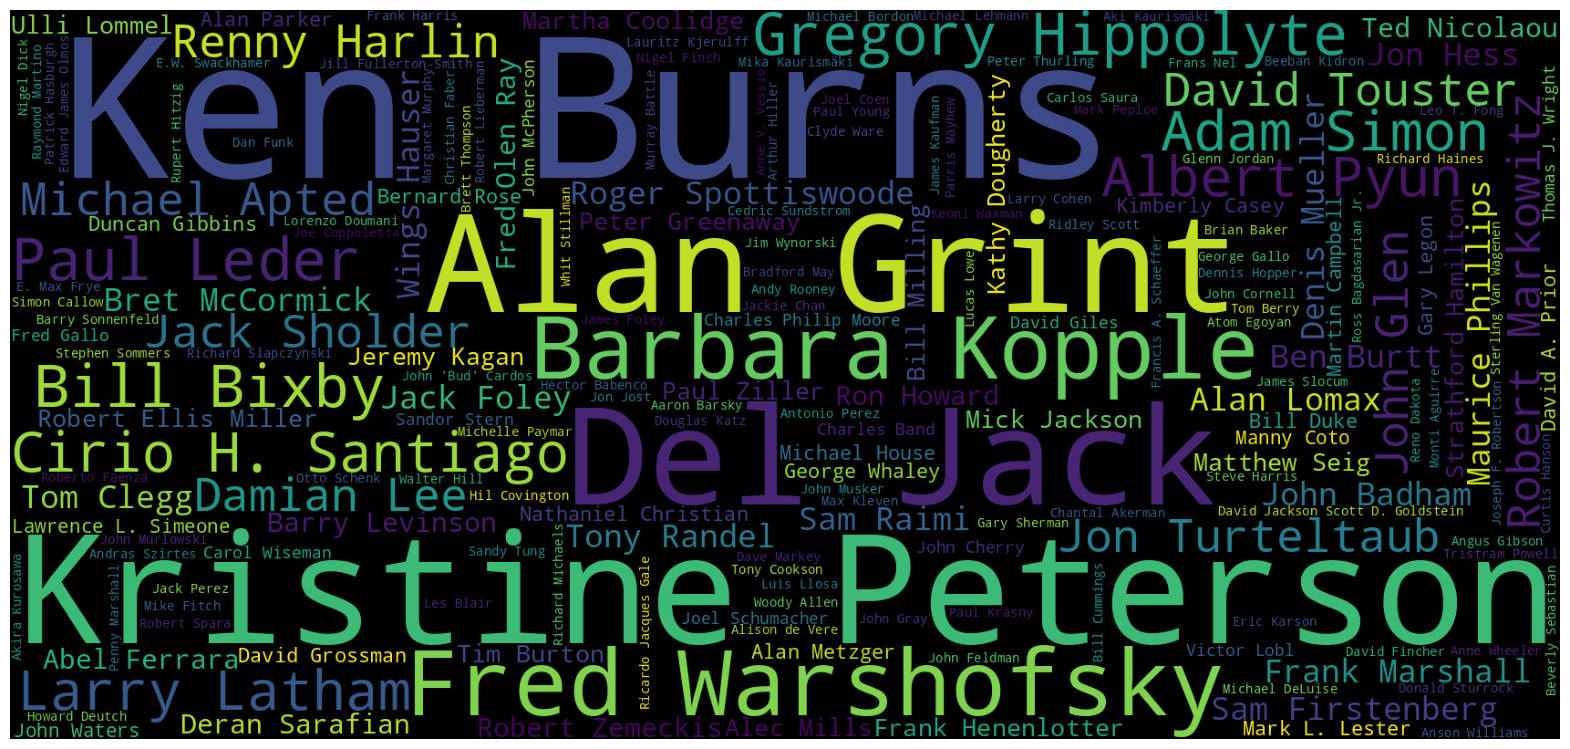

In [ ]:
plt.subplots(figsize=(20,14))
wordcloud = WordCloud(width=1700, height=800).generate_from_frequencies(words90)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

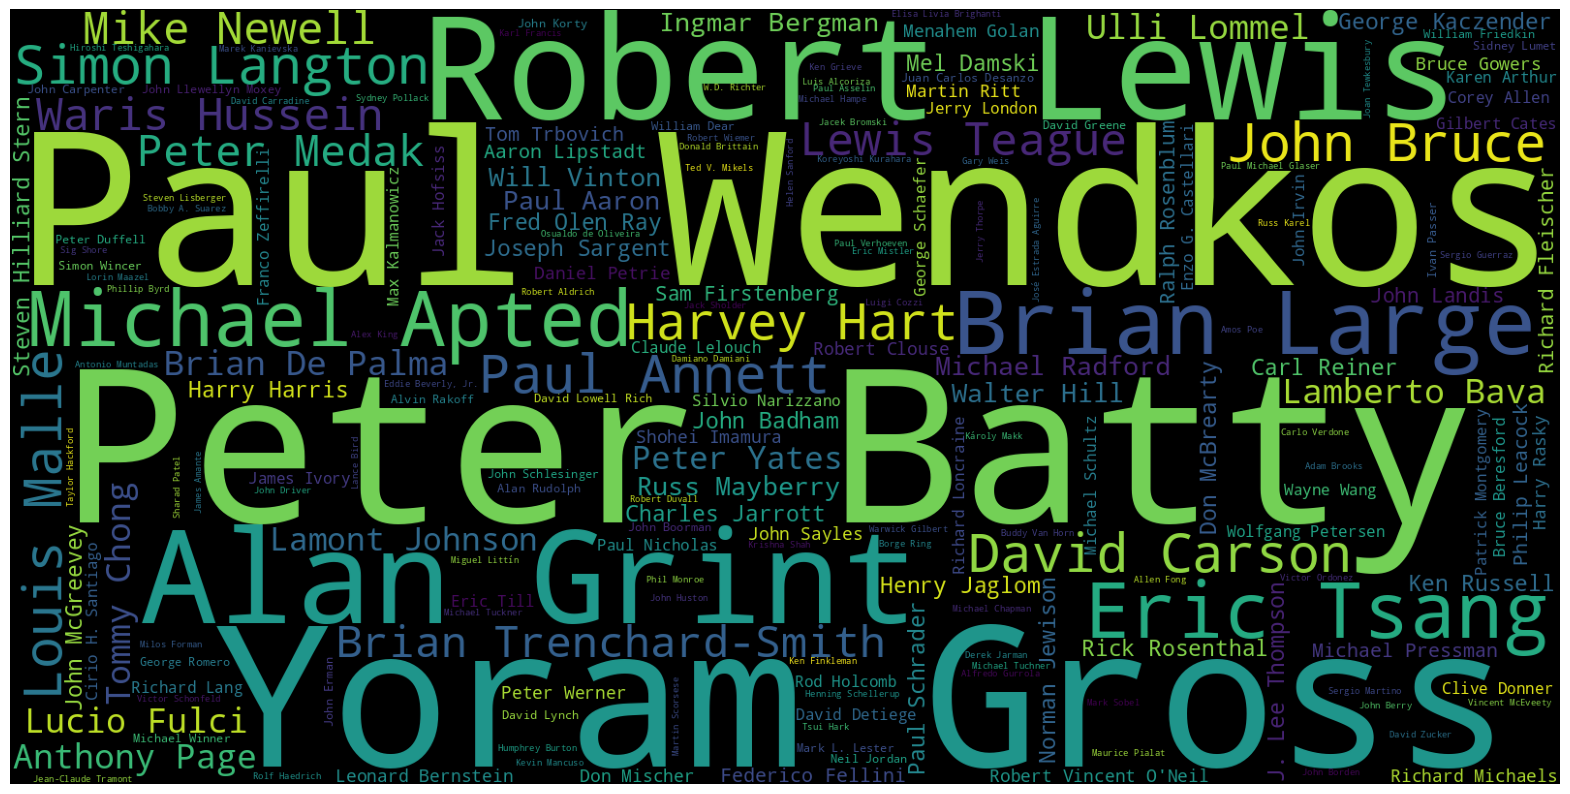

In [ ]:
plt.subplots(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(words80)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Вывод по гипотезе №4

Нет, список режиссёров изменился

Гипотеза 5

Средний рейтинг фильмов жанра драма выше, чем средний рейтинг фильмов в жанрах комедия и экшн

In [ ]:
# from pandas.core.interchange.dataframe_protocol import Column
# df_durate[['genre1', 'genre2', 'genre3']] = df_durate['genre'].str.split(',|;', expand=True, n=2)
df_genre_rate = df_work[['genre',	'average_rating']].dropna(subset=['genre',	'average_rating'])
genre3 = ['Drama', 'Comedy', 'Action']
genre3_rate = [
df_genre_rate[df_genre_rate['genre'].str.contains('Drama')]['average_rating'].mean(),
df_genre_rate[df_genre_rate['genre'].str.contains('Comedy')]['average_rating'].mean(),
df_genre_rate[df_genre_rate['genre'].str.contains('Action')]['average_rating'].mean()]
fig = px.bar(x = genre3, y = genre3_rate, title='Top rate', color = genre3_rate)
fig.show()

Вывод по гипотезе №5

обозначенная гипотеза оправдалась, действительно фильмы в жанре драма обладают лучшим средним рейтингом

Гипотеза 6

В разные десятилетия обычно разные жанры являются фаворитами; рассмотрим на примере 80-ых и 90-х

In [ ]:
released = df_work[['index', 'genre', 'released_at']].dropna(subset='released_at')
release_df80 = released[released['released_at'].str.contains('198')].dropna(subset='genre')
release_df90 = released[released['released_at'].str.contains('199')].dropna(subset='genre')

genre = ['Drama','Music','History','Comedy']
release_df80_g = release_df80[release_df80['genre'].str.contains('|'.join(genre))]
for col in genre:
    release_df80_g[col] = np.where(release_df80_g.genre.str.contains(col),1,0)

release_df90_g = release_df90[release_df90['genre'].str.contains('|'.join(genre))]
for col in genre:
    release_df90_g[col] = np.where(release_df90_g.genre.str.contains(col),1,0)

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='80s', x=genre, y=release_df80_g[genre].sum().tolist(),text=release_df80_g[genre].sum().tolist()),
    go.Bar(name='90s', x=genre, y=release_df90_g[genre].sum().tolist(),text=release_df90_g[genre].sum().tolist())
])
fig.update_layout(barmode='group')
fig.show()

Вывод по гипотезе №6

По сравнению с 80-ми где лидером был жанр драма, в 90-х сменился лидер (музыка)

Гипотеза 7

Количество снятых вестернов со временем должно снижаться, а научные число научных фильмов наоборот расти

In [ ]:
df_gan = df_work.dropna(subset=['genre', 'released_at'])

genre2 = ['Science', 'Western' ]
genre_timelapse = df_gan[df_gan['genre'].str.contains('|'.join(genre2))]
for col in genre2:
    genre_timelapse[col] = np.where(genre_timelapse.genre.str.contains(col),1,0)

genre_timelapse['decade'] = pd.to_datetime(genre_timelapse['released_at']).dt.year//10*10
genre_timelapse = genre_timelapse[['decade']+genre2].groupby("decade").sum().reset_index()

In [ ]:
x = genre_timelapse['decade'].tolist()
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = x,
    y = genre_timelapse['Science'].tolist(),
    name = 'Science',
    connectgaps = True
))

fig.add_trace(go.Scatter(
    x = x,
    y = genre_timelapse['Western'].tolist(),
    name = 'Western',
    connectgaps = True
))
fig.show()

Вывод по гипотезе №7

Действительно, исходя из полученных результатов можно сделать вывод о правильности гипотезы, также можно определить разумные рамки этого датафрейма

Гипотеза 8

События 1973 года негативно повлияли на кинематограф

In [ ]:
df_crisis = df_gan[['index', 'genre',	'released_at']].dropna(subset=['genre', 'released_at'])
df_crisis['year'] = pd.to_datetime(df_crisis['released_at']).dt.year
df_crisis['month'] = pd.to_datetime(df_crisis['released_at']).dt.month
df_crisis['year'] = df_crisis['year'].astype(str)
df_crisis73 = df_crisis[df_crisis['year'].str.contains('197|198|199')]
df_crisis73['year'] = df_crisis73['year'].astype(int)
df_crisis73

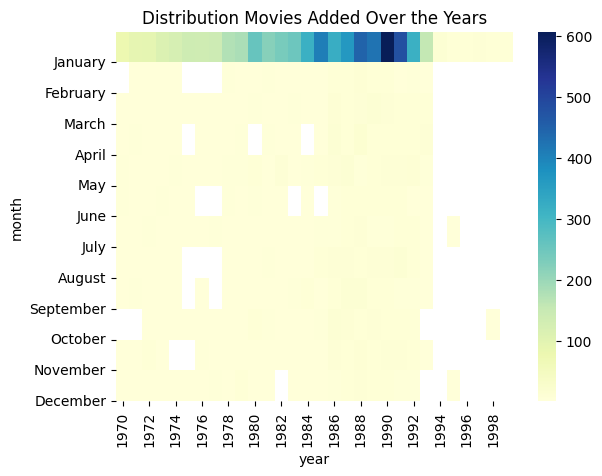

In [ ]:
show = df_crisis73.pivot_table(index="month", columns="year", values="index", aggfunc='size')
sns.heatmap(show, cmap="YlGnBu", annot=False)
month_orders = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.yticks(ticks=range(1, 13), labels=month_orders, rotation=0)
plt.title("Distribution Movies Added Over the Years")
plt.show()

Вывод по гипотезе №8

положительный ответ, в период с 1974-1976 выходило меньше фильмов

Гипотеза 9

Актриса Лив Ульман больше остальных снималась в фильмах у Ингмара Бергмана

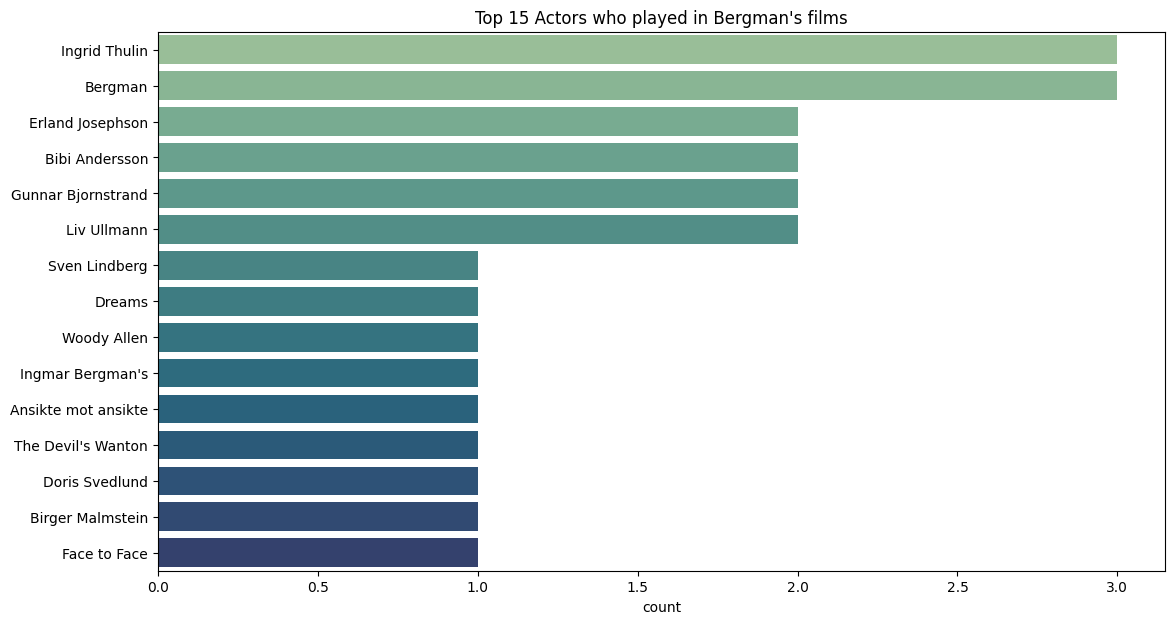

In [ ]:
keep_work = df_work.dropna(subset='director')
keep_work = keep_work[keep_work['director'].str.contains('Ingmar Bergman')]
keep_work2 = keep_work[~keep_work['cast'].str.contains('nan')]
filtered_keep_work2 = keep_work2.set_index('director').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title("Top 15 Actors who played in Bergman's films")
sns.countplot(y = filtered_keep_work2, order=filtered_keep_work2.value_counts().index[:15], palette='crest')
plt.show()

Вывод по гипотезе №9

Ингрид Тулин больше остальных снималась в фильмах у Ингмара Бергмана

Гипотеза 10

Самые плодовитые режиссёры снимали самый распространённый жанр кино - драма

In [ ]:
keep_working = df_work.dropna(subset='director')
michael_curt = keep_working[keep_working['director'].str.contains('Michael Curtiz')]
michael_curt_films = michael_curt.dropna(subset=['name'])
michael_curt_films = michael_curt_films[['director', 'genre', 'name']]
michael_curt_films['genre'] = michael_curt_films['genre'].str.split(',')
michael_curt_films = michael_curt_films.explode('genre')
michael_curt_films

In [ ]:
sam_newfield = keep_working[keep_working['director'].str.contains('Sam Newfield')]
sam_newfield_films = sam_newfield.dropna(subset=['name'])
sam_newfield_films = sam_newfield_films[['director', 'genre', 'name']]
sam_newfield_films['genre'] = sam_newfield_films['genre'].str.split(',')
sam_newfield_films = sam_newfield_films.explode('genre')
sam_newfield_films

In [ ]:
frames = pd.concat([sam_newfield_films, michael_curt_films])
frames

director             genre                     name
327      Sam Newfield           Western          Aces and Eights
417      Sam Newfield         Adventure         Adventure Island
417      Sam Newfield             Drama         Adventure Island
905      Sam Newfield           Western  Along the Sundown Trail
1442     Sam Newfield            Action      Arizona Gangbusters
...               ...               ...                      ...
8585   Michael Curtiz           Western               Dodge City
9381   Michael Curtiz             Drama             The Egyptian
9381   Michael Curtiz   Historical Film             The Egyptian
10494  Michael Curtiz            Comedy                   Female
10494  Michael Curtiz           Romance                   Female

[67 rows x 3 columns]

In [ ]:
import plotly.express as px
fig = px.treemap(frames, path=['genre','director'], color='director', hover_data=['director','name'])
fig.show()

Вывод по гипотезе №10

отрицательный результат, самый продуктивный режиссёр Sam Newfield снимал в основном вестерны и экшн

Гипотеза 11

Учитывая, что драма является самым популярным жанром у неё должен быть пик относительно других жанров

In [ ]:
# dataframe change
tear = genre_timelapse.dropna(subset=['genre', 'released_at', 'average_rating'])
michael = tear[['genre', 'released_at', 'average_rating', 'decade']]
michael['genre'] = michael['genre'].str.split(', ')
michaels = michael.explode('genre')
michaels.genre.unique()

<Axes: xlabel='decade', ylabel='genre'>

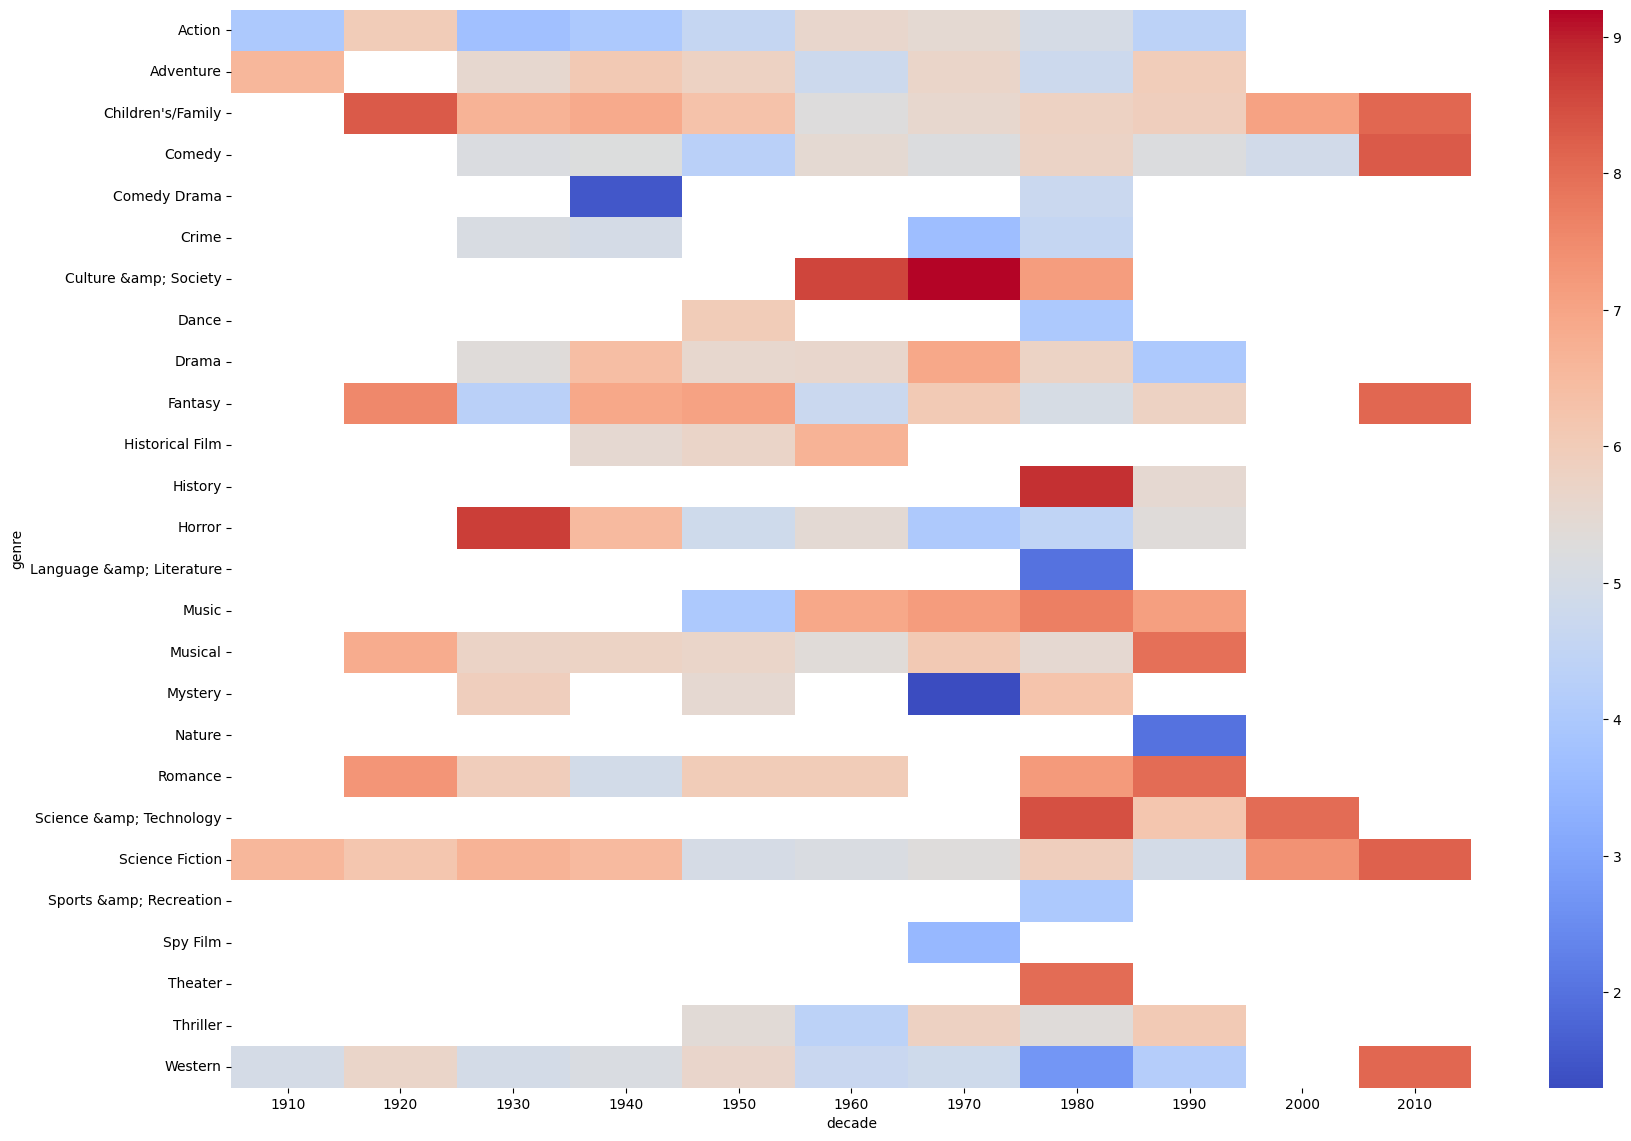

In [ ]:
heatmap_data = michaels.pivot_table(index='genre', columns='decade', values='average_rating')
plt.figure(figsize = (20,14))
sns.heatmap(data=heatmap_data, cmap='coolwarm')

Вывод по гипотезе №11

исходя из визуализации можно сделать вывод, что у драмы не было пика

Гипотеза 12

Средняя продолжительность фильмов в датасете имеет корреляцию с их жанром. Например, фильмы в жанре комедии чаще всего имеют более короткую продолжительность, чем фильмы в жанре драмы.

In [ ]:
avg_time_film = df_work[['genre', 'duration']].dropna(subset=['genre', 'duration'])
avg_time_film['genre'] = avg_time_film['genre'].str.split(', ')
avg_time_films = avg_time_film.explode('genre')
avg_time_films['duration'] = avg_time_films['duration'].str.replace('M', '')
avg_time_films['duration'] = avg_time_films['duration'].str.split('H')
avg_time_films['duration_min'] = avg_time_films['duration'].str[0].astype(int)*60 + avg_time_films['duration'].str[1].astype(int)
avg_time_final = avg_time_films.groupby(['genre']).mean().reset_index()
avg_time_final = avg_time_final.sort_values(by='duration_min')

<ipython-input-194-3c98cef23ce8>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = px.bar(avg_time_final, x = 'genre', y ='duration_min', title='Corr', color_discrete_sequence =['green'])
fig.show()

Вывод по гипотезе №12

Да, комедии действительно имеют продолжительность меньше чем драмы

Гипотеза 13

 Фильмы, выпущенные в последние годы, имеют более высокий средний рейтинг, чем фильмы, выпущенные ранее.

In [ ]:
film_len = df_work[['released_at', 'average_rating']].dropna(subset=['released_at', 'average_rating'])
film_len['decade'] = pd.to_datetime(film_len['released_at']).dt.year//10*10
film_len

In [ ]:
genre4 = ['Old', 'New']
genre4_rate = [
film_len[film_len['decade']>1989]['average_rating'].mean(),
film_len[film_len['decade']<1989]['average_rating'].mean()
]
fig = px.bar(x = genre4, y = genre4_rate, title='Average rate', color = genre4_rate)
fig.show()

Вывод по гипотезе №13

да, в фильмах новее 1990 года средний рейтинг выше

Гипотеза 14

In [ ]:
from collections import Counter
df_synopsis = df_work[['synopsis']].dropna(subset=['synopsis'])
synopsis = df_synopsis['synopsis'].values
synopsis

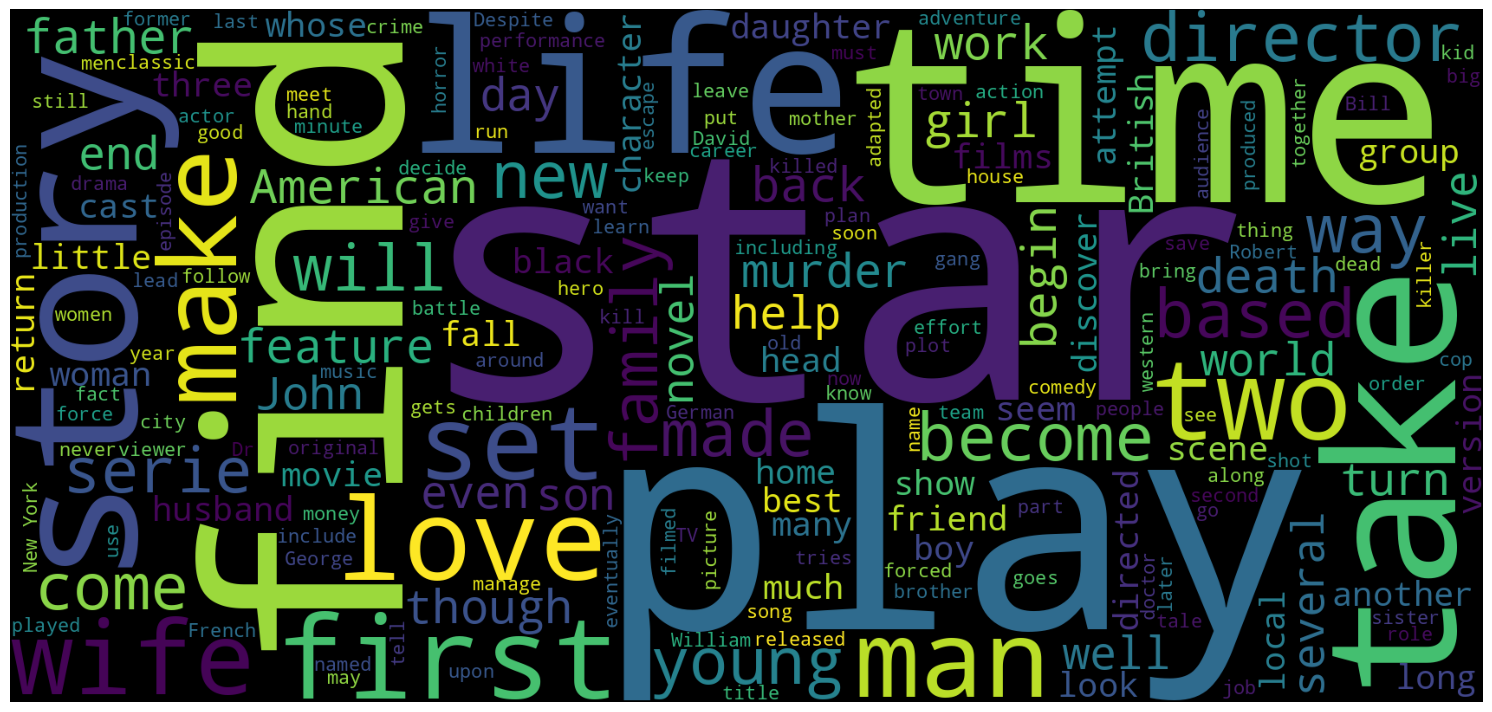

In [ ]:
plt.subplots(figsize=(19,14))
wordcloud = WordCloud()
stop_words = set(list(wordcloud.stopwords) + ['quot', 'video', 'one', 'film'])
wordcloud = WordCloud(width=1700, height=800, stopwords=stop_words).generate_from_text(' '.join(synopsis))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Гипотеза 15

В названиях фильмов слова (story, America, love, death, city) должны часто встречаться

In [ ]:
df_named = df_work[['name']].dropna(subset=['name'])
named = df_named['name'].values
named

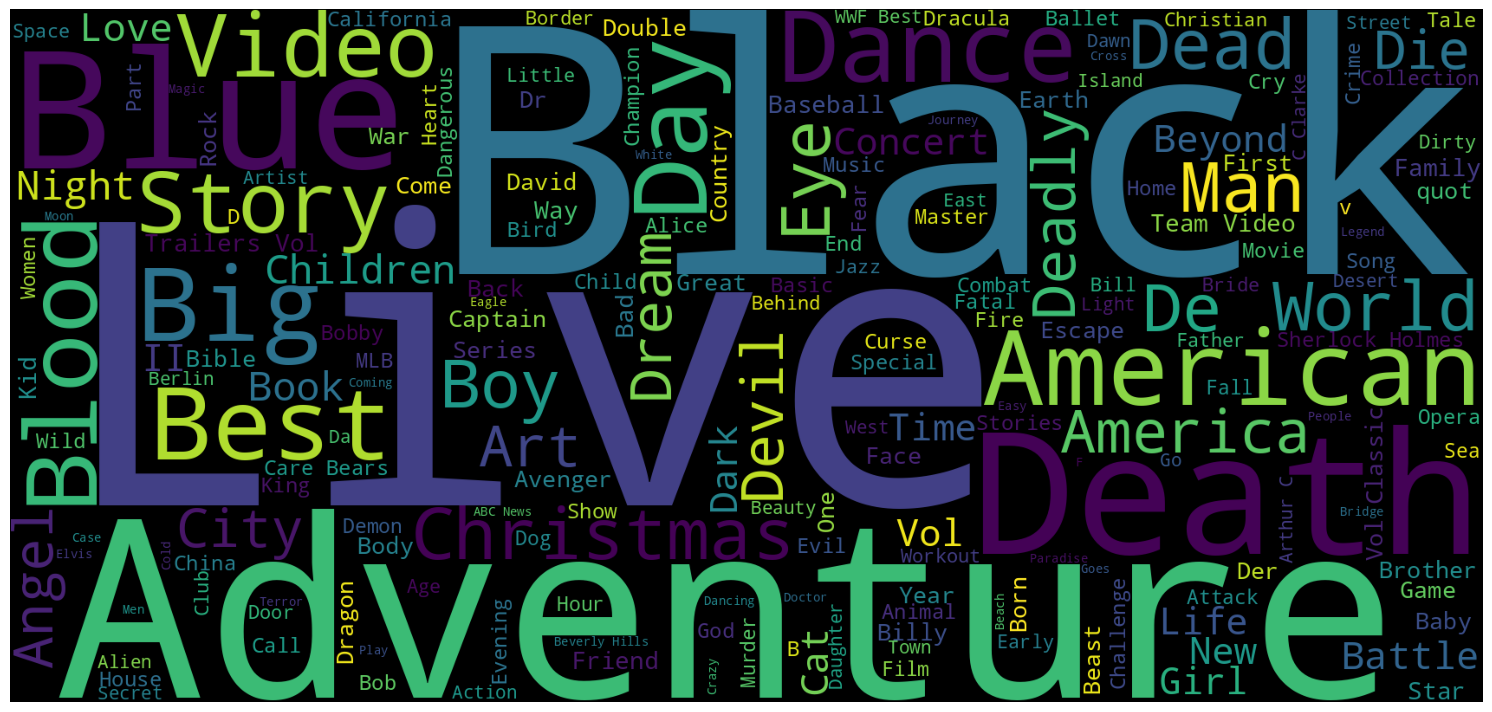

In [ ]:
plt.subplots(figsize=(19,14))
wordcloud = WordCloud()
stop_words = set(list(wordcloud.stopwords) + ['La', 'El', 'amp', 'à'])
wordcloud = WordCloud(width=1700, height=800, stopwords=stop_words).generate_from_text(' '.join(named))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Вывод по гипотезе №15

да, эти слова часто встречается

Гипотеза 16

Если режиссёр имеет актёров-любимчиков, то они должны сниматься в трети их фильмов

In [ ]:
curt = keep_working[keep_working['director'].str.contains('Michael Curtiz')]
curt_films = curt.dropna(subset=['cast'])
curt_films = curt_films[['director', 'cast']]
curt_films['cast'] = curt_films['cast'].str.split(',')
curt_films = curt_films.explode('cast')
curt_films = curt_films[~curt_films['cast'].str.contains('Around|nan')]
curt_films.sort_values(by='cast')

In [ ]:
newfield = keep_working[keep_working['director'].str.contains('Sam Newfield')]
newfield_films = newfield.dropna(subset=['cast'])
newfield_films = newfield_films[['director', 'cast']]
newfield_films['cast'] = newfield_films['cast'].str.split(',')
newfield_films = newfield_films.explode('cast')
newfield_films = newfield_films[~newfield_films['cast'].str.contains('Adventure|nan')]

In [ ]:
frames2 = pd.concat([curt_films, newfield_films])
frames3 = frames2.groupby(['director', 'cast']).agg(qty=("cast", "count")).reset_index()
frames4 = frames3[(frames3['qty']>1) & (frames3['cast']!='')].sort_values(by='qty', ascending=False)
frames4

In [ ]:
fig = px.treemap(frames4, path=['director', 'qty','cast'], color='director')
fig.show()

Вывод по гипотезе №16

нет, за пример были взяты два самых популярных режиссёра и у них любимчики снимались в 1/4 фильмов и 1/5 фильмов

# Заметки для себя

In [ ]:
gend = df_work.groupby("duration").agg({"index":"count"})
gend.sort_values(by='index', ascending=False)

In [ ]:
listed_country = []
for row,items in df.iterrows():
    for item in items['country'].split(","):
        if item.strip() not in listed_country:
            listed_country.append(item.strip())

nums = [0]*len(listed_country)
for row,items in df.iterrows():
    for item in items['country'].split(","):
        index = listed_country.index(item.strip())
        nums[index]+=1

df_con = pd.DataFrame({"Type":listed_country,"Count":nums})
df_con.sort_values(by="Count", ascending=False)

In [ ]:
Drama = df.loc[df['genre'].str.contains('Drama')].count()[0]
Comedy = df.loc[df['genre'].str.contains('Comedy')]

In [ ]:
avg_time_film2 = df_work[['genre', 'duration', 'released_at']].dropna(subset=['genre', 'duration', 'released_at'])
avg_time_film2['genre'] = avg_time_film2['genre'].str.split(', ')
avg_time_films2 = avg_time_film2.explode('genre')
avg_time_films2['duration'] = avg_time_films2['duration'].str.replace('M', '')
avg_time_films2['duration'] = avg_time_films2['duration'].str.split('H')
avg_time_films2['duration_min'] = avg_time_films2['duration'].str[0].astype(int)*60 + avg_time_films2['duration'].str[1].astype(int)
avg_time_final2 = avg_time_films2.groupby(['genre']).mean().reset_index()
avg_time_final2

<ipython-input-221-b30a03aaef7c>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



genre  duration_min
0                                Action     88.770010
1                                 Adult     77.966667
2                             Adventure     83.890311
3            Avant-garde / Experimental     43.791045
4                              Business     49.833333
5                     Children's/Family     47.606602
6                                Comedy     83.497104
7                          Comedy Drama     98.131068
8                                 Crime     91.923529
9                 Culture &amp; Society     53.397959
10                                Dance     61.538462
11                                Drama     96.548759
12                            Education     70.580645
13                                 Epic    138.125000
14  Family &amp; Personal Relationships     51.000000
15                              Fantasy     77.550000
16                                 Film     60.659259
17                 Health &amp; Fitness     50.024793
18                      Historical Film    115.183908
19                              History     55.273423
20                               Horror     86.439791
21            Language &amp; Literature     48.505376
22                         Leisure Arts     48.652778
23                                Music     62.832564
24                              Musical     97.836478
25                              Mystery     83.873278
26                               Nature     52.744681
27                            News [TV]     57.000000
28                              Romance     95.030660
29             Science &amp; Technology     55.059211
30                      Science Fiction     83.306785
31        Spirituality &amp; Philosophy     48.177083
32              Sports &amp; Recreation     55.183544
33                             Spy Film     87.134146
34                       TV &amp; Radio     60.659259
35                              Theater     92.534884
36                             Thriller     93.556131
37                               Travel     52.363636
38                          Visual Arts     37.810256
39                                  War    105.341463
40                              Western     74.540404

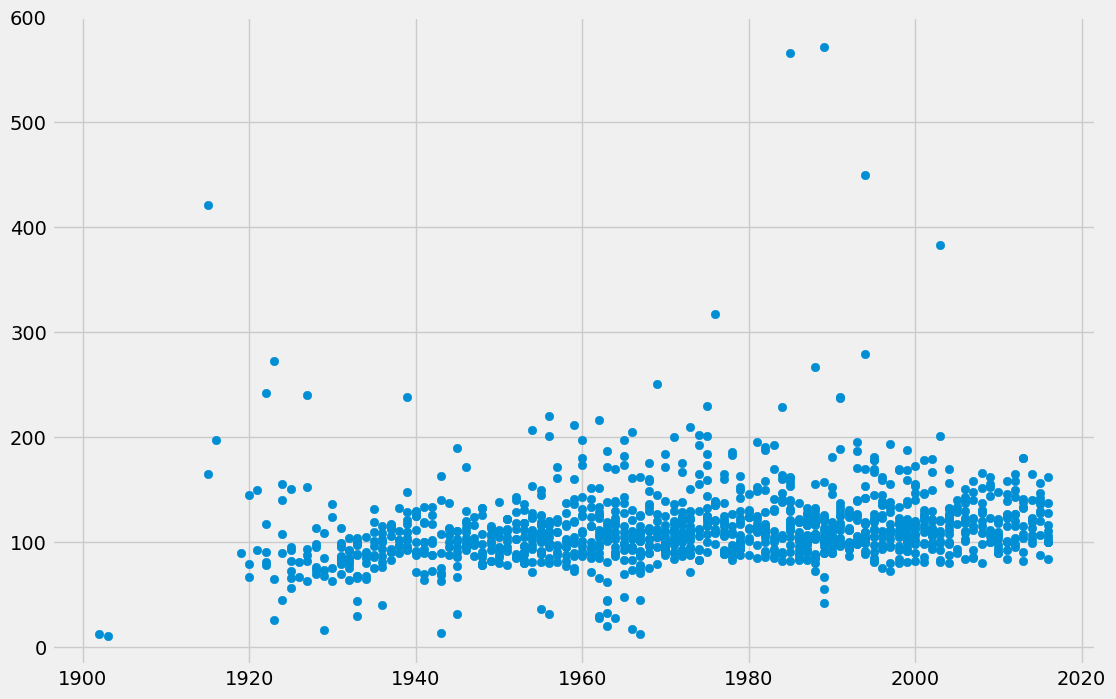

In [ ]:
fig = plt.figure(figsize=(12,8))
df['year'] = df['year'].astype(int)

df['duration'] = df['runtime'].str.replace(' min', '')
df['runtime'] = df['runtime'].replace('', pd.NA)
df['runtime'] = df['runtime'].dropna().astype(int)
plt.scatter(df['year'], df['runtime'])
plt.show()

In [ ]:
colors = []
for lab, row in df.iterrows() :
    if row['genre'] == ('Drama'):
        colors.append('red')
    elif row['genre'] == 'Comedy':
        colors.append('blue')
    elif row['genre'] == 'Documentary':
        colors.append('green')
    elif row['genre'] == 'Romance':
        colors.append('pink')
    else:
        colors.append('black')

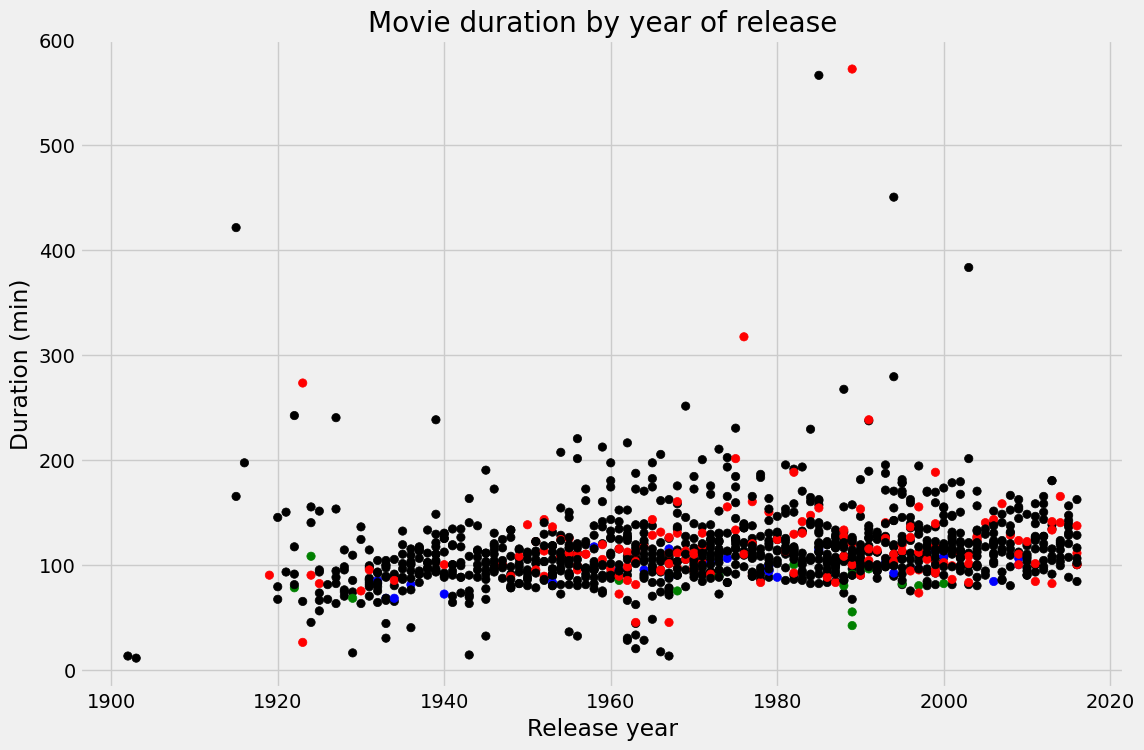

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
plt.scatter(df['year'], df['runtime'], c=colors)
plt.title('Movie duration by year of release')
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.show()

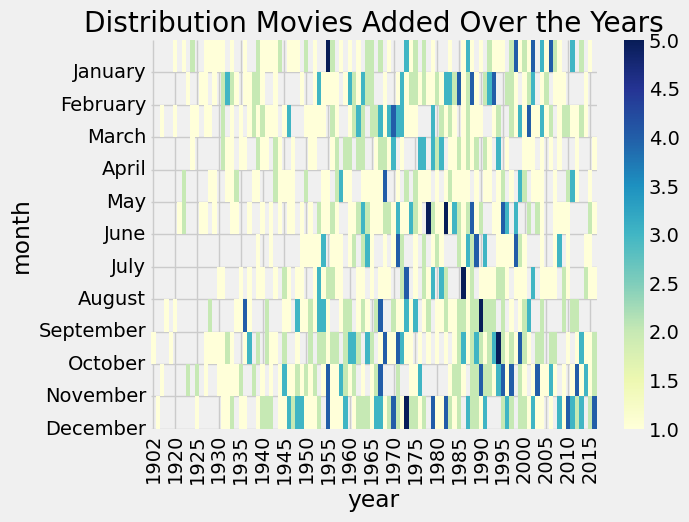

In [ ]:
shows = df.pivot_table(index="month", columns="year", values="index", aggfunc='size')
sns.heatmap(shows, cmap="YlGnBu", annot=False)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.yticks(ticks=range(1, 13), labels=month_order, rotation=0)
plt.title("Distribution Movies Added Over the Years")
plt.show()

In [ ]:
import plotly.graph_objs as go
fig1 = go.Figure(data=[go.Bar(x=df2017['Trade Value (US$)'],
                             y=df2017['Partner'],
                             marker=dict(color = '#ac7eee'),
                             name='Partner', orientation='h',
                             text=df2017['Trade Value (US$)'].astype(int),
                             textposition='auto',
                             hoverinfo='text',
                             hovertext=
                            '<b>Partner</b>:'+ df2017['Partner'] +'<br>' +
                            '<b>Trade Value (US$)</b>:'+ df2017['Trade Value (US$)'].astype(int).astype(str) +'<br>')])
fig1.update_layout(title_text='The 10 Countries',
                   paper_bgcolor="#000001",
                   plot_bgcolor='#1f2c56',
                font=dict(
                size=14,
                color='white'))
fig1.update_yaxes(showgrid=False, categoryorder='total ascending')
#